In [1]:
library("igraph")
cond <- read.graph("cond-mat-2003.gml", format="gml")
write.graph(cond, "cond-mat-2003.net", format="pajek")
vcount(cond)  #31163 nodes
ecount(cond)  #120029 edges


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



[1] 31163

[1] 120029

In [2]:
library("repr")  #For resizing plots

# Change plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)

## Summary

### Pre-processing
1.	Create an R-script file and log all the commands. 
2.	Read data in gml-format in R – iGraph
3.	Check if the network is undirected/directed and weighted/unweighted
4.	Calculate degree and plot degree distribution
5.	 Check if the network is connected
6.	Identify the largest connected component
7.	Retain only this largest component
8.	Calculate degree and plot degree distribution again.
9.	Save new network in gml and pajek format
10.	Save the label list (author names)


### Clustering & Visualization
1.	Run three community detection algorithms from the igraph packages on both networks (original data set and the largest connected component): cluster_leading_eigen; cluster_louvain; cluster_walktrap
2.	Calculate modularity scores for each cluster solution
3.	Try to visualize (a sample of) at least one network with nodes in different colour according to their cluster membership
4.	Compare the obtained cluster solutions


[1] FALSE

[1] FALSE

[1] 7.703302

[1] FALSE

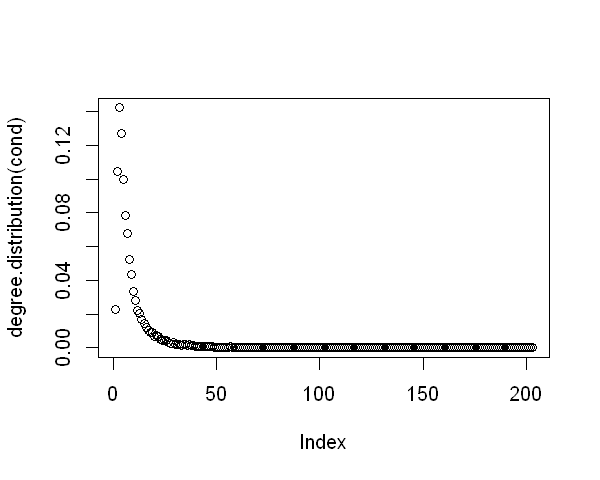

In [3]:
is.directed(cond)  #FALSE
is.weighted(cond)  #FALSE
deg_cond <- degree(cond)
mean(deg_cond)     #7.703302
plot(degree.distribution(cond))

is.connected(cond) #FALSE

### Identify the largest connected component

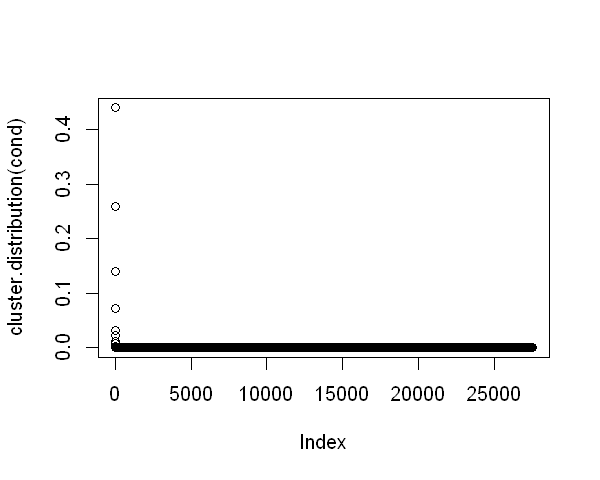

In [4]:
plot(cluster.distribution(cond))
clu_cond <- clusters(cond,mode='weak')
#clusters - Calculate the maximal (weakly or strongly) connected components of a graph
#clu_cond$csize
#clu_cond$membership

[1] 1

[1] 31163

[1] 3644

[1] TRUE

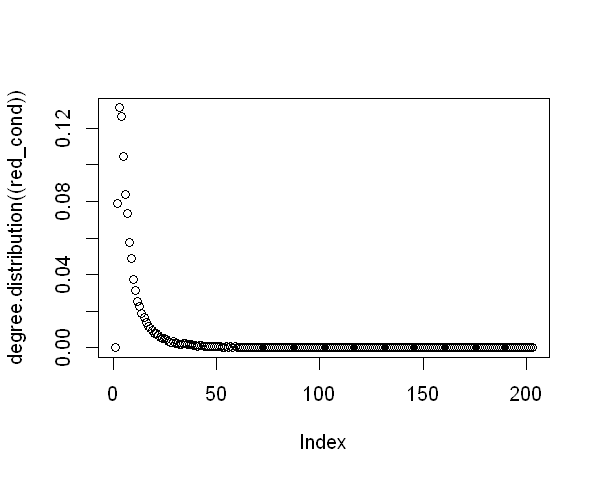

In [5]:
index_largest_component <- which(clu_cond$csize==max(clu_cond$csize))
index_largest_component #1
red_cond <- delete.vertices(cond,V(cond)[clu_cond$membership>index_largest_component])
length(V(cond))                                               #31163
length(V(cond)[clu_cond$membership>index_largest_component])  #3644
plot(degree.distribution((red_cond)))

is.connected(red_cond) #TRUE

### Writing the strongly connected component in both gml & pajek (.net) format

In [6]:
write.graph(red_cond,"cond-mat-2003_largeComponent.net",format="pajek")
write.graph(red_cond,"cond-mat-2003_largeComponent.gml",format="gml")
#save the label list (author names)
write.table(V(cond)$label, "cond-mat-2003_Labels.txt",col.names=FALSE, sep="\t")

# Clustering and visualization
### cluster_leading_eigen

In [7]:
lecond <- cluster_leading_eigen(cond)        #Clustering for all components
lerdcond <- cluster_leading_eigen(red_cond)  #Clustering for strongly connected components
#modularity scores
modularity(cond,membership(lecond))          #0.343773
modularity(red_cond,membership(lerdcond))    #0.5972439
length(lecond)     #1603 different communities?
length(lerdcond)   #46
#membership(lerdcond) #Shows cluster member id for each nodes
#sizes(lerdcond)      #Shows number of cluster members in each of the community

[1] 0.343773

[1] 0.5972439

[1] 1603

[1] 46

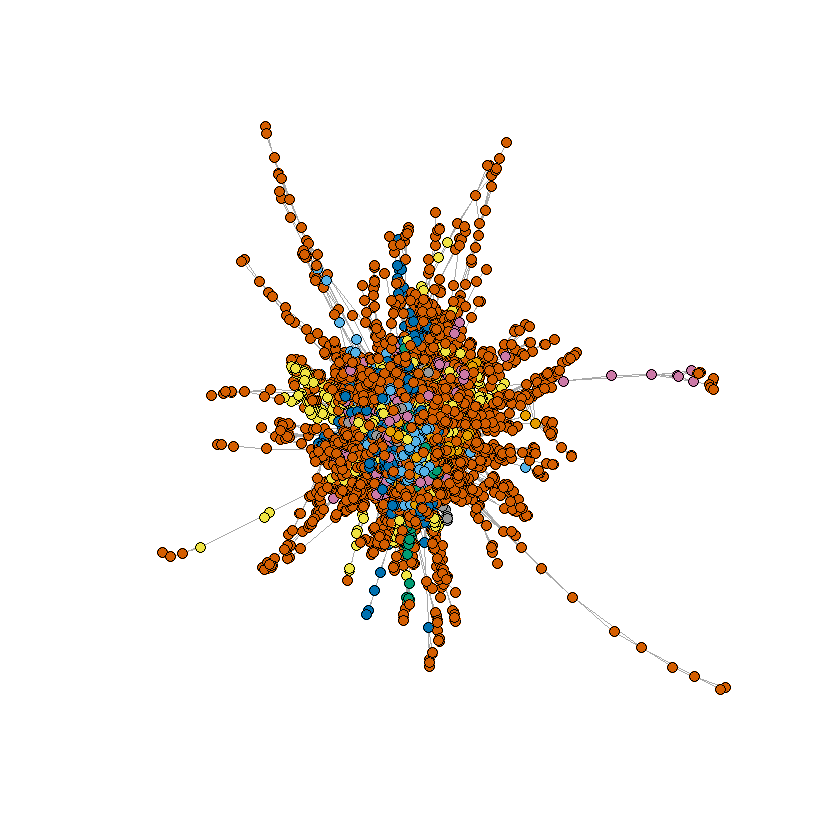

In [8]:
options(repr.plot.width=7, repr.plot.height=7)
V(red_cond)$color = lerdcond$membership  #Assign color to nodes based on their community id
plot(red_cond,layout=layout_with_fr,vertex.size=4,vertex.label=NA)  #Frutcherman-Reingold layout

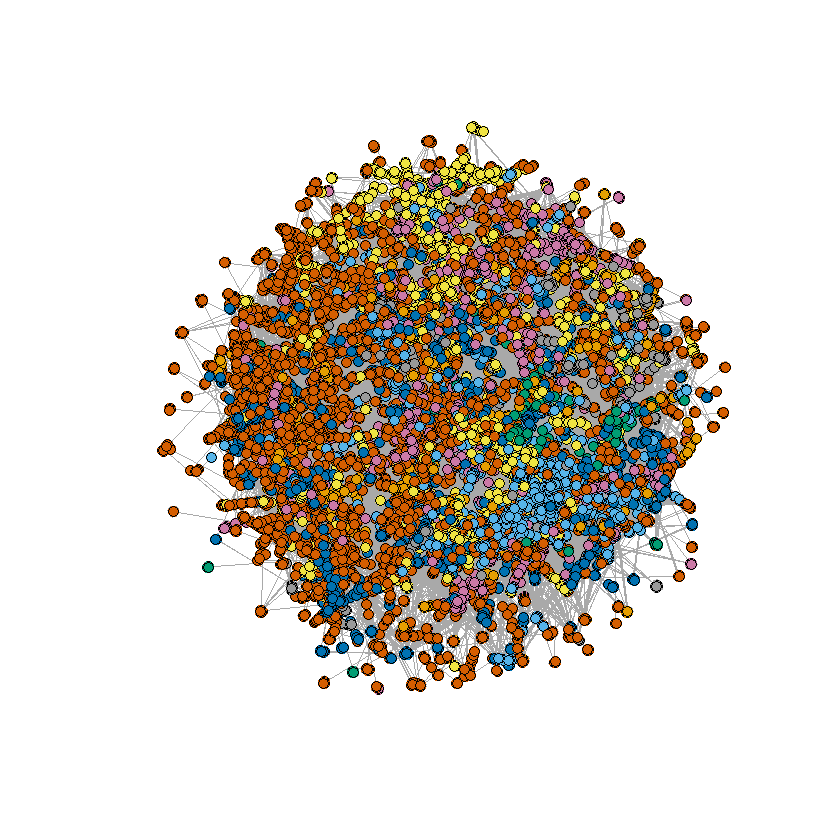

In [9]:
plot(red_cond,layout=layout_with_drl,vertex.size=4,vertex.label=NA) #Force-directed layout (slow!)

### cluster_louvain

In [10]:
loucond <- cluster_louvain(cond)
lourdcond <- cluster_louvain(red_cond)
#modularity scores
modularity(cond,membership(loucond))         #0.7602468
modularity(red_cond,membership(lourdcond))   #0.750688
length(loucond)     #1667 different communities
length(lourdcond)   #72 different communities
#membership(lourdcond) #Shows cluster member id for each nodes
#sizes(lourdcond)      #Shows number of cluster members in each of the community

[1] 0.7602468

[1] 0.750688

[1] 1667

[1] 72

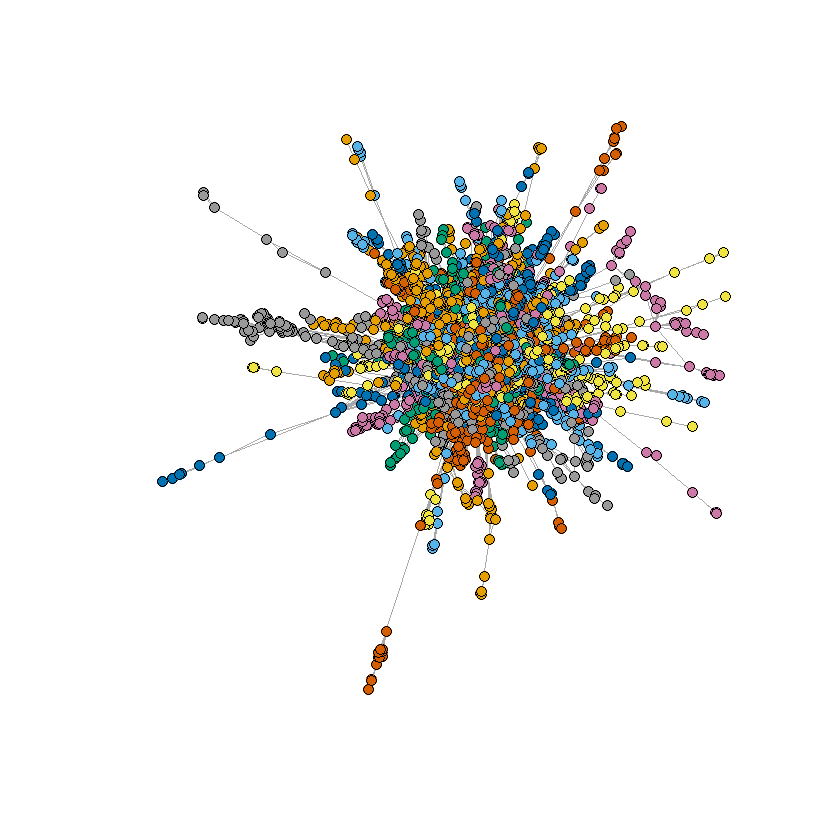

In [11]:
V(red_cond)$color = lourdcond$membership  #Assign color to nodes based on their community id
plot(red_cond,layout=layout_with_fr,vertex.size=4,vertex.label=NA)  #Frutcherman-Reingold layout

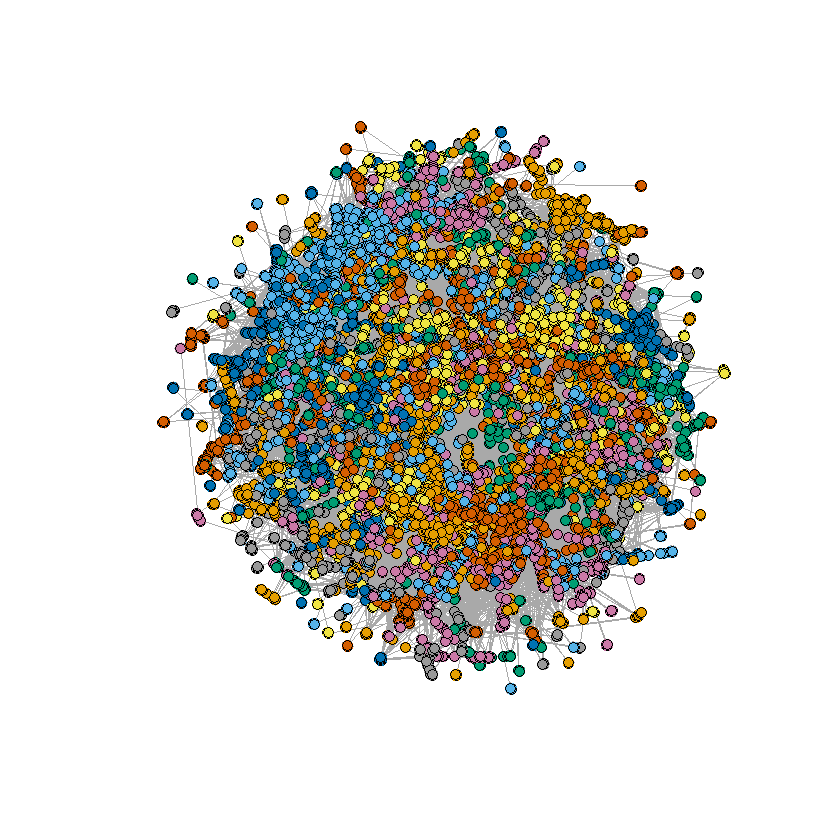

In [12]:
plot(red_cond,layout=layout_with_drl,vertex.size=4,vertex.label=NA) #Force-directed layout (slow!)

### cluster_walktrap
This function tries to find densely connected subgraphs, also called communities in a graph via random walks. The idea is that short random walks tend to stay in the same community.

In [13]:
wtcond <- cluster_walktrap(cond) #very slow!
wtrdcond <- cluster_walktrap(red_cond)
#modularity scores
modularity(cond,membership(wtcond))          #0.6458526
modularity(red_cond,membership(wtrdcond))    #0.6308135
length(wtcond)     #3877 different communities
length(wtrdcond)   #2240 different communities! (Meaning very few members per community)
#membership(wtrdcond) #Shows cluster member id for each nodes
#sizes(wtrdcond)      #Shows number of cluster members in each of the community

[1] 0.6458526

[1] 0.6308135

[1] 3877

[1] 2240

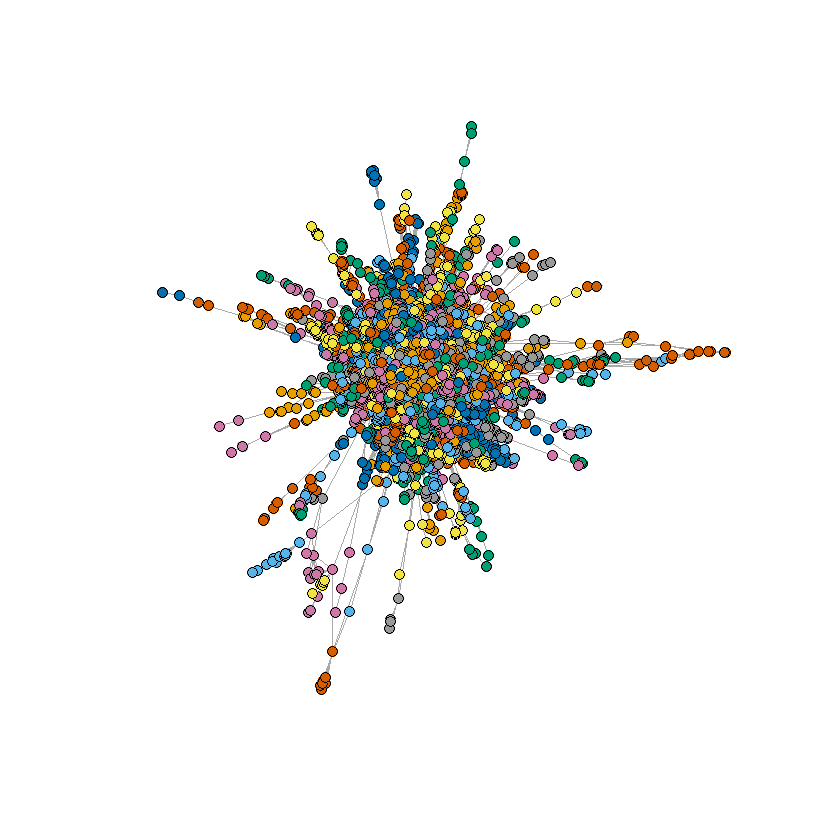

In [14]:
V(red_cond)$color = wtrdcond$membership  #Assign color to nodes based on their community id
plot(red_cond,layout=layout_with_fr,vertex.size=4,vertex.label=NA)  #Frutcherman-Reingold layout

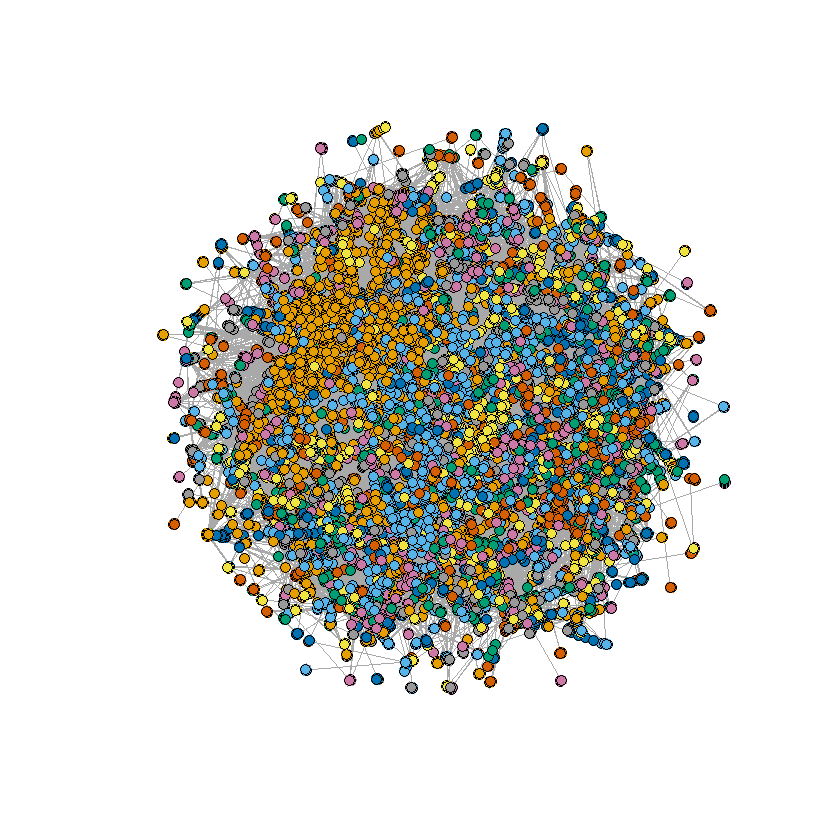

In [15]:
plot(red_cond,layout=layout_with_drl,vertex.size=4,vertex.label=NA) #Force-directed layout (slow!)

### Leiden Algorithm

In [16]:
#https://cran.r-project.org/web/packages/leiden/vignettes/run_leiden.html
#https://www.rdocumentation.org/packages/leiden/versions/0.2.3/topics/leiden

## Comparing Cluster Algorithm

In [17]:
collab <-read.graph("C://Users//Triguna//Desktop//Artificial Intelligence//Analysis of Large Scale Social Networks//Exercises//Session 5//Datasets//netscicoauthor2010.net", format="pajek")

vcount(collab)        #552
ecount(collab)        #1318
is.connected(collab)  #TRUE
is.weighted(collab)   #TRUE

[1] 552

[1] 1318

[1] TRUE

[1] TRUE

### cluster_infomap

[1] 0.783181

[1] 64

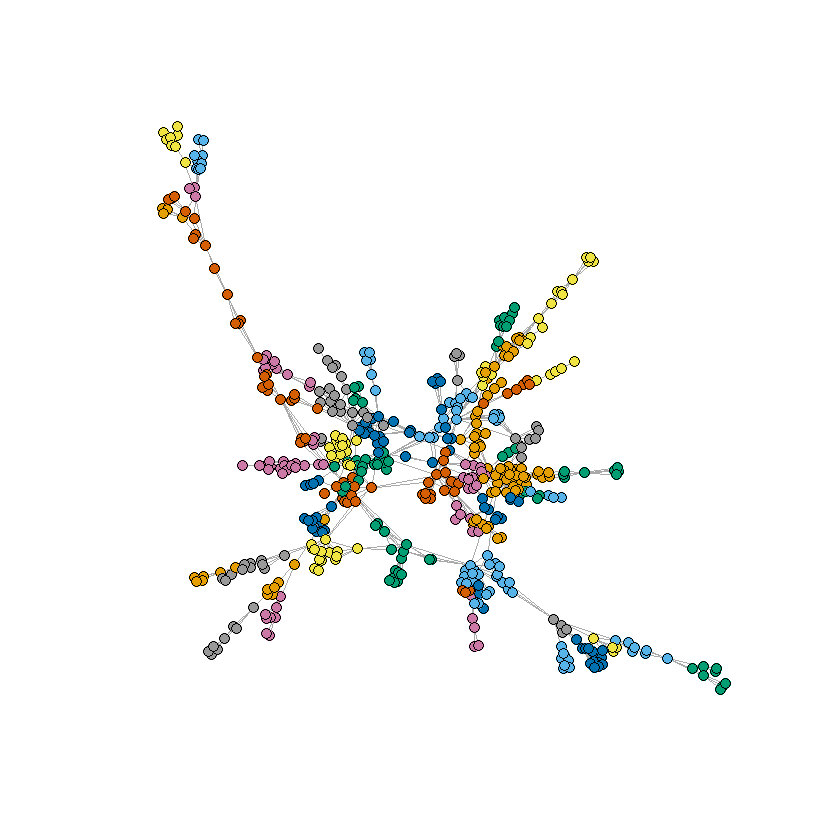

In [18]:
clu_info <- cluster_infomap(collab)
modularity(collab,membership(clu_info))  #0.783181
length(clu_info)     #64 communities
V(collab)$color <- membership(clu_info)
plot(collab, layout=layout_with_fr, vertex.size=4, vertex.label=NA )

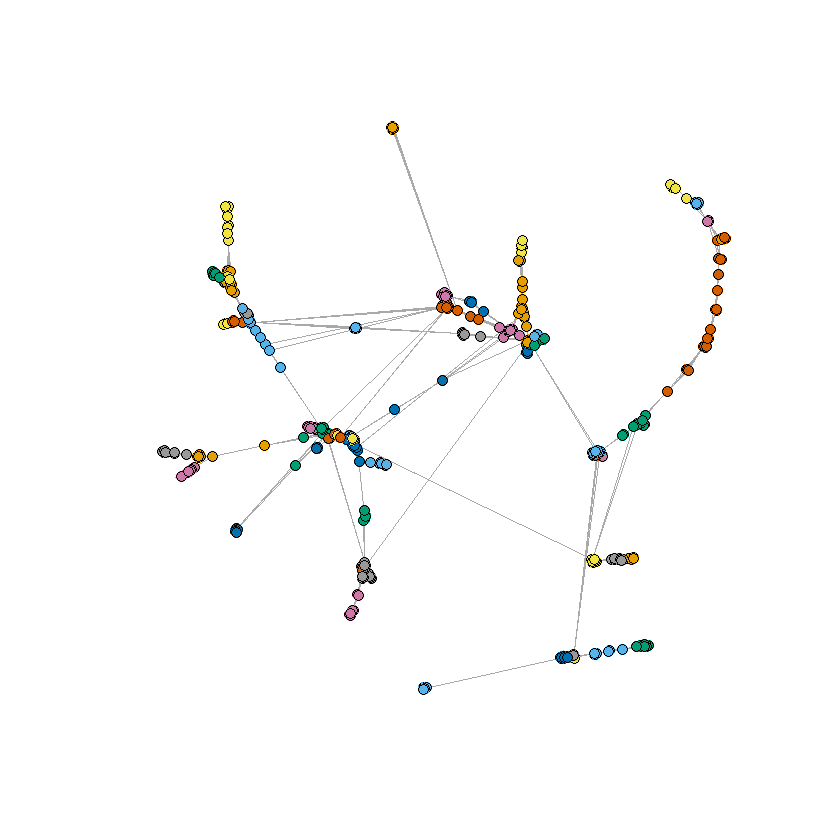

In [19]:
plot(collab, layout=layout_with_drl, vertex.size=4, vertex.label=NA )

### cluster_louvain

[1] 0.842104

[1] 25

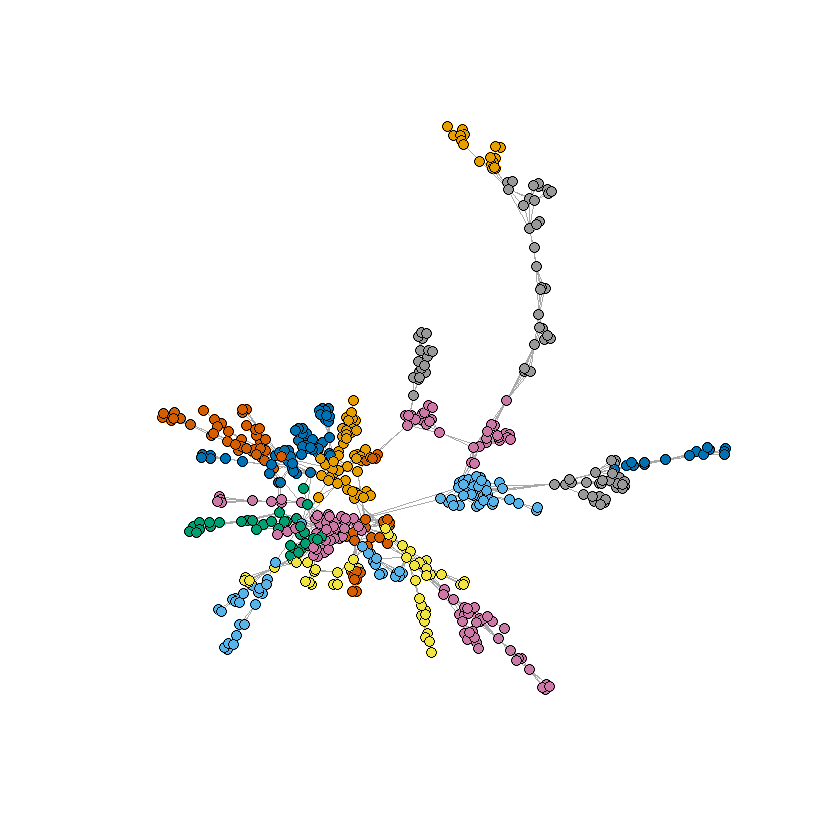

In [20]:
clu_lvn <- cluster_louvain(collab)
modularity(collab,membership(clu_lvn))   #0.842104
length(clu_lvn)      #25 communities
V(collab)$color <- membership(clu_lvn)
plot(collab, layout=layout_with_fr, vertex.size=4, vertex.label=NA )

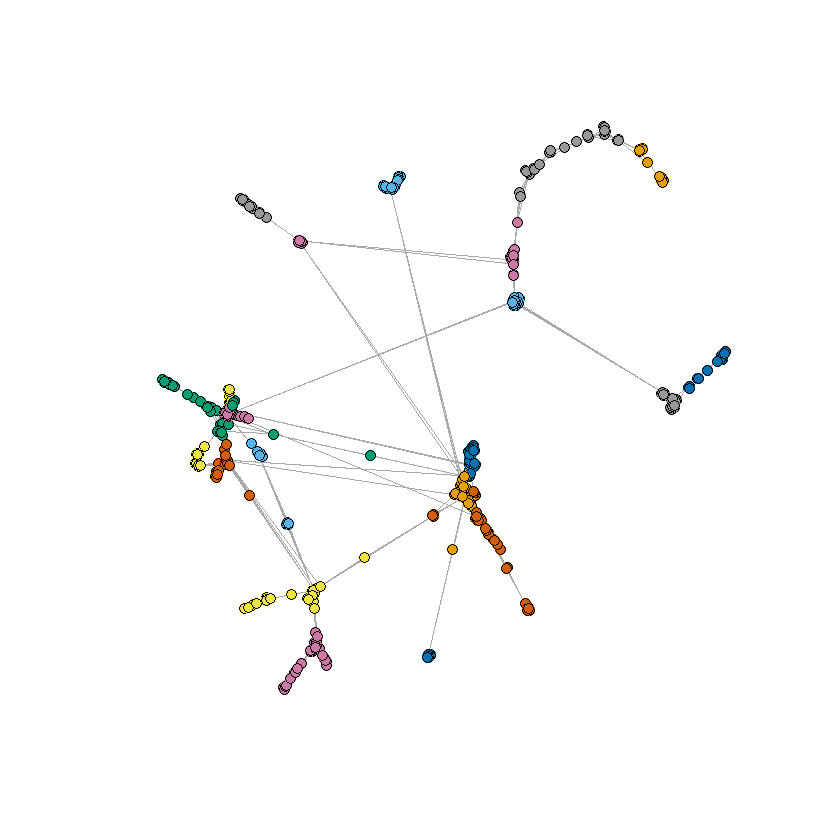

In [21]:
plot(collab, layout=layout_with_drl, vertex.size=4, vertex.label=NA )

### Comparing Clustering Algorithms

In [22]:
compare(clu_info$membership,clu_lvn$membership)                   #0.9660796
compare(clu_info$membership, clu_lvn$membership, method='rand')   #0.9689234
compare(clu_info$membership, clu_lvn$membership, method='nmi')    #0.8627399

[1] 0.9660796

[1] 0.9689234

[1] 0.8627399

In [23]:
library('ClusterR')
external_validation(clu_info$membership,clu_lvn$membership, method = "adjusted_rand_index", summary_stats = T)
#methods (rand_index, adjusted_rand_index, jaccard_index, fowlkes_Mallows_index, mirkin_metric, purity, entropy, 
#nmi (normalized mutual information) and var_info (variation of information)

Loading required package: gtools

Attaching package: 'gtools'

The following object is masked from 'package:igraph':

    permute



 
---------------------------------------- 
purity                         : 0.5707 
entropy                        : 0.0058 
normalized mutual information  : 0.8627 
variation of information       : 1.3938 
normalized var. of information : 0.2414 
---------------------------------------- 
specificity                    : 0.9687 
sensitivity                    : 0.9817 
precision                      : 0.3959 
recall                         : 0.9817 
F-measure                      : 0.5643 
---------------------------------------- 
accuracy OR rand-index         : 0.9689 
adjusted-rand-index            : 0.5512 
jaccard-index                  : 0.393 
fowlkes-mallows-index          : 0.6234 
mirkin-metric                  : 9452 
---------------------------------------- 


[1] 0.5511516

In [24]:
x <- scan("C://Users//Triguna//Desktop//Artificial Intelligence//Analysis of Large Scale Social Networks//Exercises//Session 5//Datasets//netscicoauthor2010_undir.clu", what="", sep="\n")
clu_orig = as.list(x[2:553])
compare(clu_info$membership, clu_orig, method='rand')

Warning message in file(file, "r"):
"cannot open file 'C://Users//Triguna//Desktop//Artificial Intelligence//Analysis of Large Scale Social Networks//Exercises//Session 5//Datasets//netscicoauthor2010_undir.clu': No such file or directory"

ERROR: Error in file(file, "r"): cannot open the connection
